# Problem Statement

Description: Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

Objective: Understand the Dataset & cleanup (if required). Build classification model to predict weather the loan borrower will default or not. Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Loan_Default.csv")

# Features

ID = Customer ID of Applicant
year = Year of Application
loan limit = maximum avaliable amount of the loan allowed to be taken
Gender = sex type
approv_in_adv = Is loan pre-approved or not
loan_type = Type of loan
loan_purpose = the reason you want to borrow money
Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
business_or_commercial = Usage type of the loan amount
loan_amount = The exact loan amount
rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
term = the loan's repayment period
Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
interest_only = amount of interest only without principles
lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
property_value = the present worth of future benefits arising from the ownership of the property
construction_type = Collateral construction type
occupancy_type = classifications refer to categorizing structures based on their usage
Secured_by = Type of Collatoral
total_units = number of unites
income = refers to the amount of money, property, and other transfers of value received over a set period of time
credit_type = type of credit
co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
age = applicant's age
submission_of_application = Ensure the application is complete or not
LTV = life-time value (LTV) is a prognostication of the net profit
Region = applicant's place
Security_Type = Type of Collatoral
status = Loan status (Approved/Declined)
dtir1 = debt-to-income ratio

In [3]:
df

ID  year loan_limit             Gender approv_in_adv loan_type  \
0        24890  2019         cf  Sex Not Available         nopre     type1   
1        24891  2019         cf               Male         nopre     type2   
2        24892  2019         cf               Male           pre     type1   
3        24893  2019         cf               Male         nopre     type1   
4        24894  2019         cf              Joint           pre     type1   
...        ...   ...        ...                ...           ...       ...   
148665  173555  2019         cf  Sex Not Available         nopre     type1   
148666  173556  2019         cf               Male         nopre     type1   
148667  173557  2019         cf               Male         nopre     type1   
148668  173558  2019         cf             Female         nopre     type1   
148669  173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0                p1                l1        nopc                  nob/c  ...   
1                p1                l1        nopc                    b/c  ...   
2                p1                l1        nopc                  nob/c  ...   
3                p4                l1        nopc                  nob/c  ...   
4                p1                l1        nopc                  nob/c  ...   
...             ...               ...         ...                    ...  ...   
148665           p3                l1        nopc                  nob/c  ...   
148666           p1                l1        nopc                  nob/c  ...   
148667           p4                l1        nopc                  nob/c  ...   
148668           p4                l1        nopc                  nob/c  ...   
148669           p3                l1        nopc                  nob/c  ...   

        credit_type  Credit_Score  co-applicant_credit_type    age  \
0               EXP           758                       CIB  25-34   
1              EQUI           552                       EXP  55-64   
2               EXP           834                       CIB  35-44   
3               EXP           587                       CIB  45-54   
4              CRIF           602                       EXP  25-34   
...             ...           ...                       ...    ...   
148665          CIB           659                       EXP  55-64   
148666          CIB           569                       CIB  25-34   
148667          CIB           702                       EXP  45-54   
148668          EXP           737                       EXP  55-64   
148669          CIB           830                       CIB  45-54   

        submission_of_application        LTV Region Security_Type  Status  \
0                         to_inst  98.728814  south        direct       1   
1                         to_inst        NaN  North        direct       1   
2                         to_inst  80.019685  south        direct       0   
3                        not_inst  69.376900  North        direct       0   
4                        not_inst  91.886544  North        direct       0   
...                           ...        ...    ...           ...     ...   
148665                    to_inst  71.792763  south        direct       0   
148666                   not_inst  74.428934  south        direct       0   
148667                   not_inst  61.332418  North        direct       0   
148668                    to_inst  70.683453  North        direct       0   
148669                   not_inst  72.849462  North        direct       0   

       dtir1  
0       45.0  
1        NaN  
2       46.0  
3       42.0  
4       39.0  
...      ...  
148665  48.0  
148666  15.0  
148667  49.0  
148668  29.0  
148669  44.0  

[148670 rows x 34 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
#checking shape of our dataset
df.shape

(148670, 34)

In [6]:
#checking all features names
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
df.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [8]:
df['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [9]:
#checking duplicates 
df.duplicated().sum()

0

In [10]:
df.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [11]:
table = df['Status'].value_counts().reset_index()
table.columns = ['Status', 'Number']
table['Status'] = table['Status'].map({1 :'Defaulted', 0 :'Not defaulted'})
table

Status  Number
0  Not defaulted  112031
1      Defaulted   36639

In [12]:
import plotly.express as px

fig = px.pie(table,
             values='Number', 
             names = 'Status',
             title='Default Status')
fig.show() 

Here 24.6% people would have loan default, resulting in a imbalanced classification.

In [13]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

# loan defaulted : 1 = 36639 and not defaulted : 0 = 112031

# Some Characteristics of data & Visualization

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [15]:
import missingno as msno

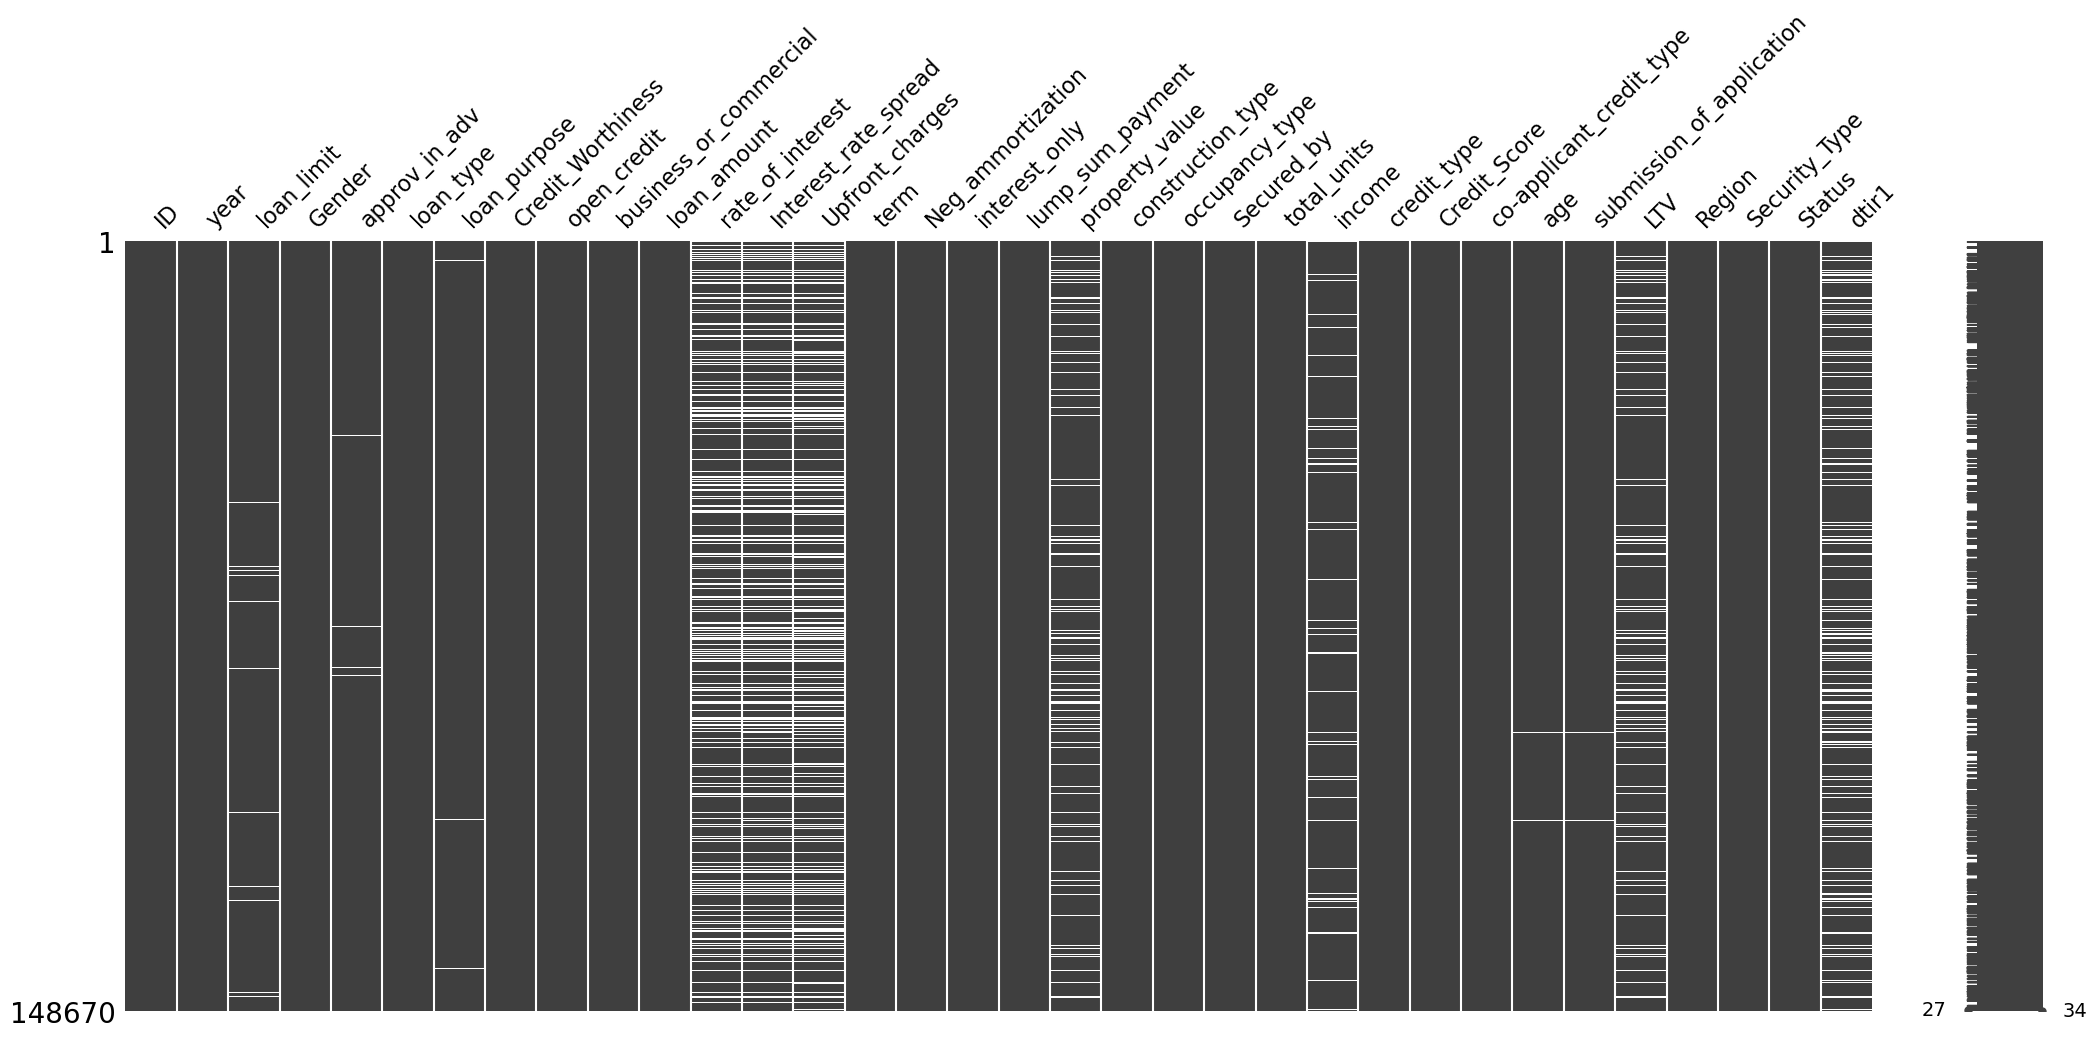

In [16]:
#null values distribution
msno.matrix(df)
plt.show()

# Checking if the Loan defaulter is dependent on Gender

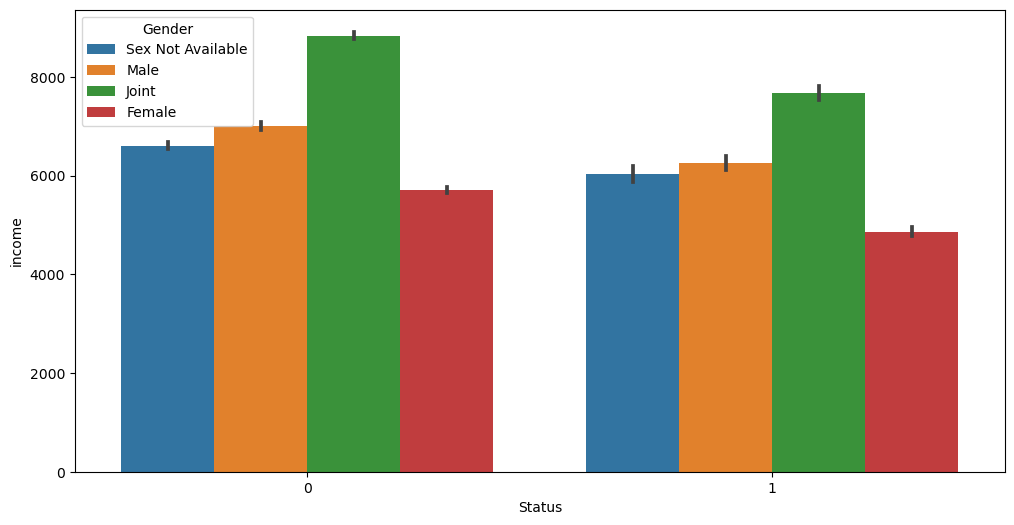

In [17]:
fig,ax=plt.subplots()
sns.barplot(data=df,x='Status',y='income',hue='Gender')
fig.set_size_inches([12,6])
plt.show()

In [18]:
df['Gender'].value_counts()

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

# How Loan defaulter is related to Credit score and Loan Amount¶

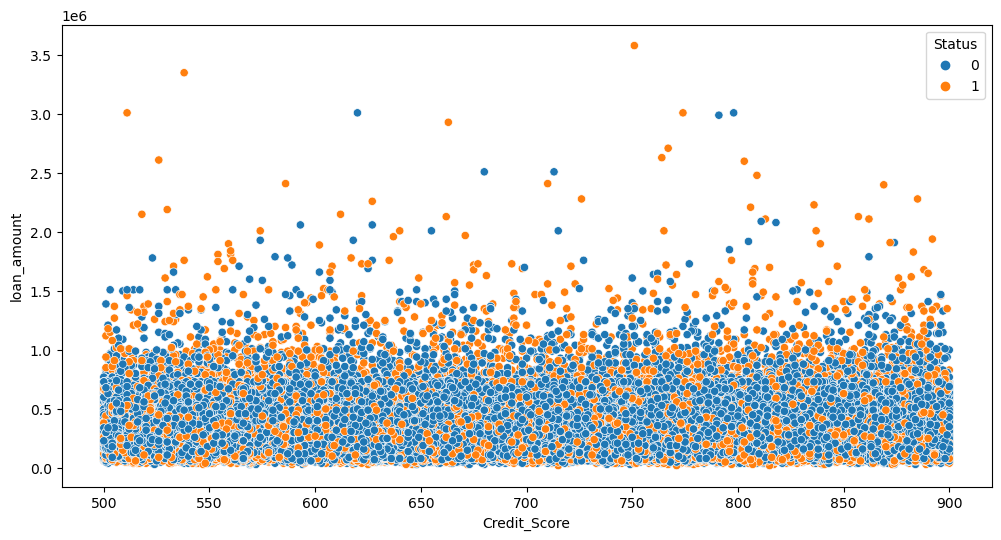

In [19]:
fig,ax=plt.subplots()
sns.scatterplot(x='Credit_Score',y='loan_amount',data=df,hue='Status')
fig.set_size_inches([12,6])
plt.show()

# Let plot Pie and count plot

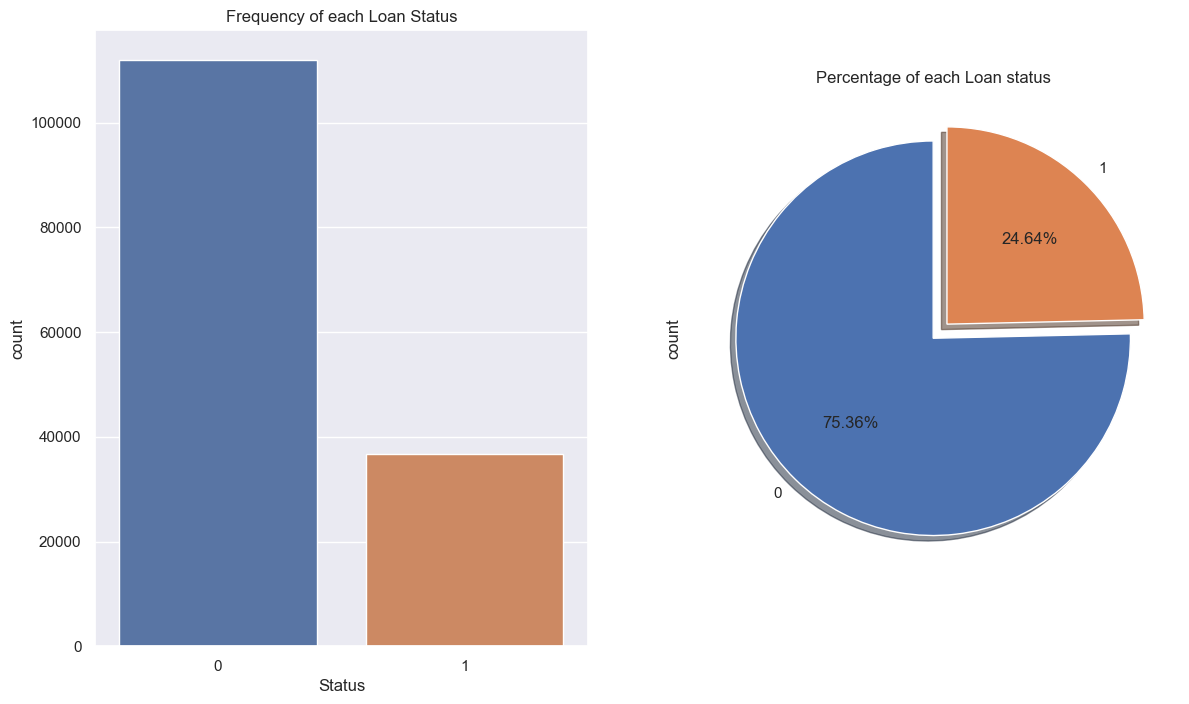

In [20]:
sns.set_theme()
fig, axs = plt.subplots(1,2,figsize=(14,8))
sns.countplot(x='Status',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
df.Status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],shadow =True,explode = (0, 0.1,),autopct='%1.2f%%',startangle=90 )
axs[1].set_title("Percentage of each Loan status")
plt.show()

This clearly is a case of an imbalanced class problem where the value of class is far less than the other. There are cost function based approaches and sampling based approaches for handling this kind of problem which we will use later so that our model doesn't exhibit high bias while trying to predict if a loan will default or not.

A common thing to predict in datasets like these are if a new loan will get default or not. I'll be keeping loans with default status as my target variable.

Here, We have finalize loan status as our target variable which has now 24 % are defaulters for the loan payment.

<Axes: xlabel='loan_type', ylabel='count'>

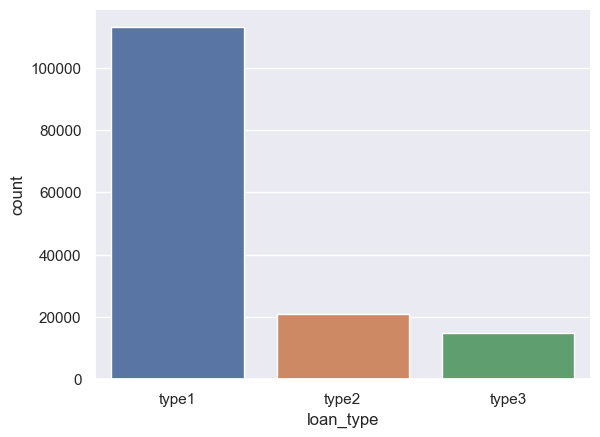

In [21]:
sns.countplot(data=df , x='loan_type')

<Axes: xlabel='Status', ylabel='count'>

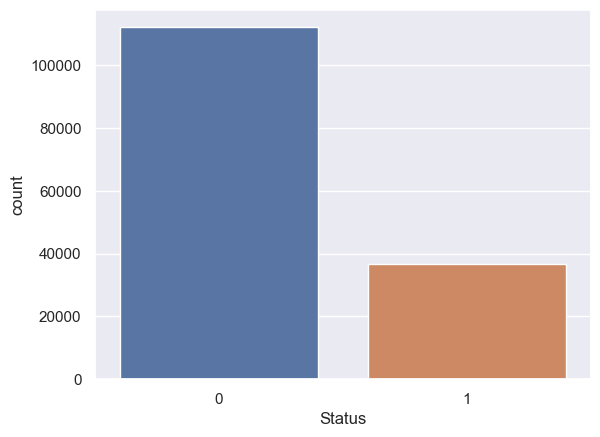

In [22]:
sns.countplot(data=df , x='Status')

<Axes: xlabel='age', ylabel='count'>

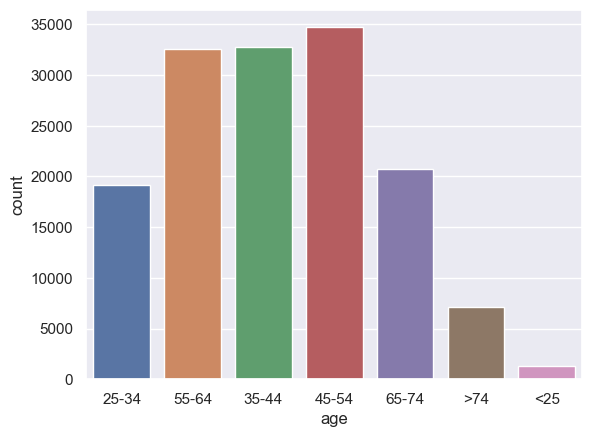

In [23]:
sns.countplot(data=df , x='age')

<Axes: xlabel='rate_of_interest', ylabel='income'>

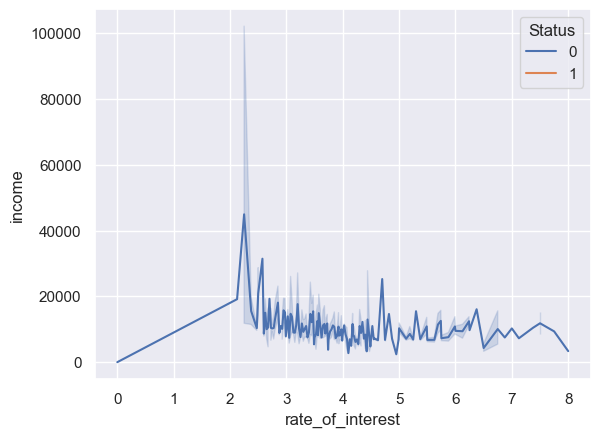

In [24]:
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="Status")

C:\Users\User\OneDrive\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



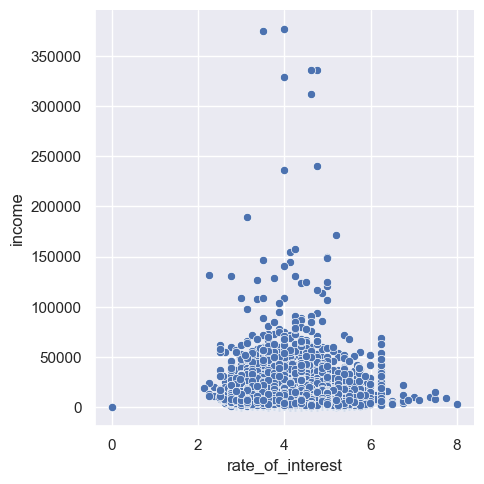

In [25]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

C:\Users\User\OneDrive\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



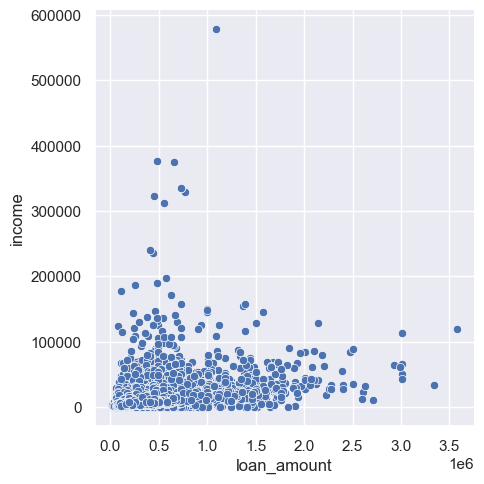

In [26]:
sns.relplot(x ="loan_amount", y ="income",data = df)

C:\Users\User\OneDrive\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



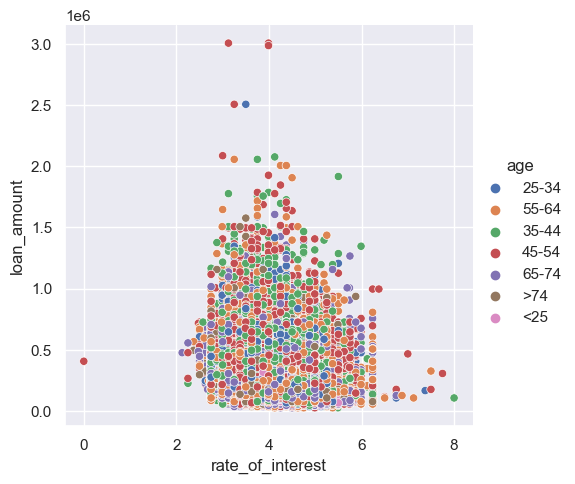

In [27]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='age' ,data = df)

C:\Users\User\OneDrive\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



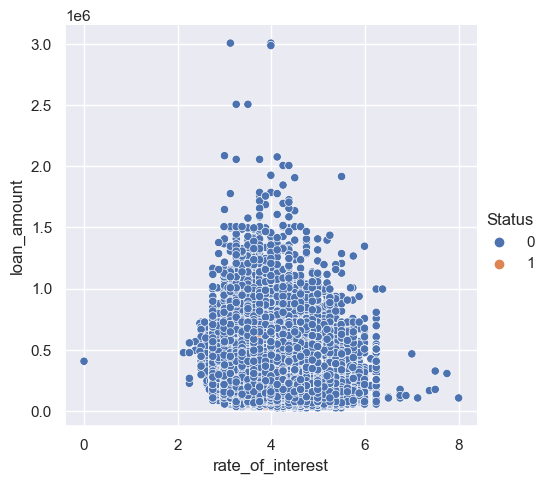

In [28]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='Status' ,data = df)

C:\Users\User\AppData\Local\Temp\ipykernel_15364\258400812.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='loan_amount', ylabel='Density'>

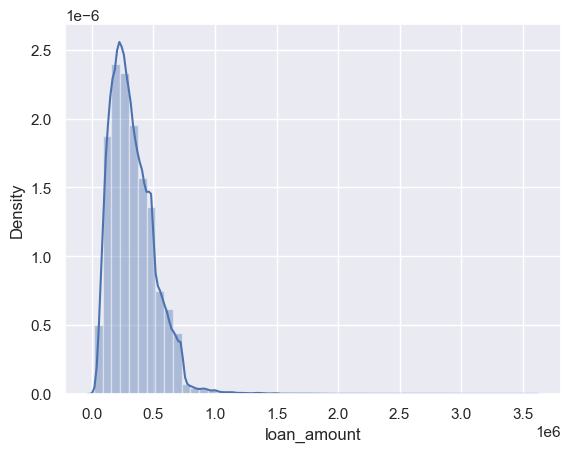

In [29]:
sns.distplot(df['loan_amount'])

<Axes: xlabel='Status', ylabel='loan_amount'>

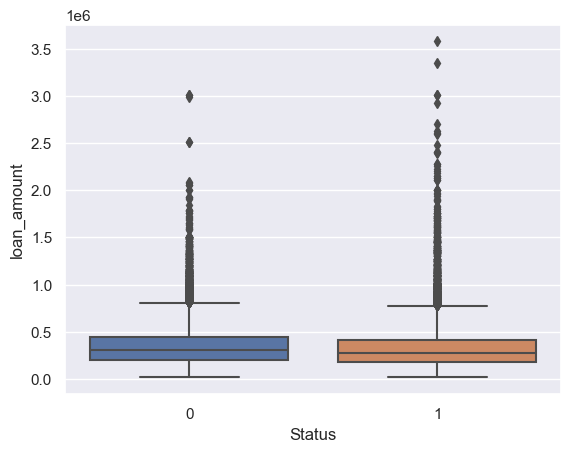

In [30]:
sns.boxplot(data=df , x='Status' , y ='loan_amount')

<Axes: xlabel='Status', ylabel='term'>

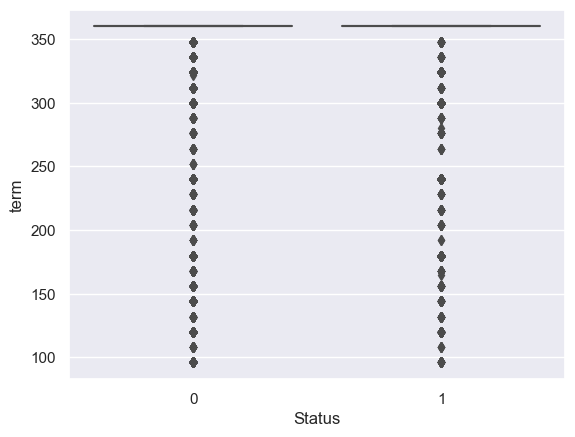

In [31]:
sns.boxplot(data=df , x='Status' , y ='term')

<Axes: xlabel='Status', ylabel='income'>

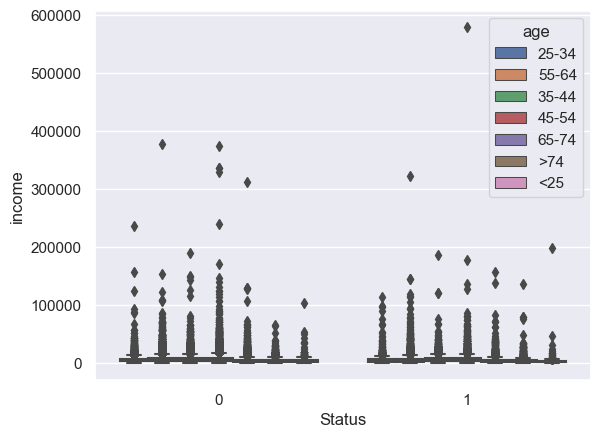

In [32]:
sns.boxplot(data=df , x='Status' , y ='income' , hue='age')

C:\Users\User\OneDrive\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



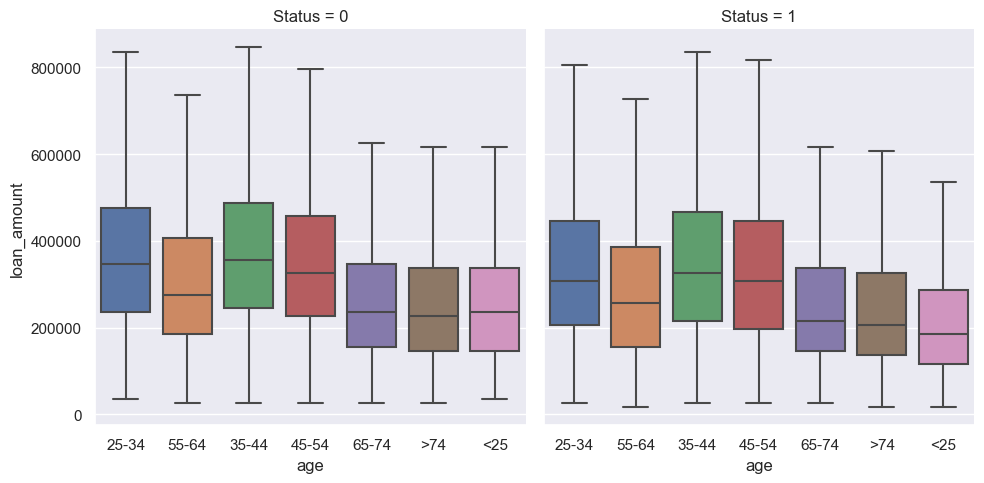

In [33]:
sns.catplot(data=df,x='age',y='loan_amount',kind='box',col='Status',sym="")

In [34]:
# Getting dataframes by datatype
dtypes = pd.DataFrame(df.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

We'll start with numerical data first. An effective way of filling NaN values for numerical data is using a KNNImputer from sklearn. We could fill in the null values using the column median but this will often bias the data, especially when there are many missing values. KNNImputer uses the columns that have values (at that index) to estimate the null value of a certain entry.

In [35]:
num_vars

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

In [36]:
#droping year
df = df.drop('year' , axis = 1)

# Now we will handle Missing value¶


In [37]:
#checking null values
df.isna().sum()

ID                               0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

In [38]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [39]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(10)

Dataframe has 33 columns.
There are 14 columns that have missing values.


Missing Values  % of Total Values
Upfront_charges                39642               26.7
Interest_rate_spread           36639               24.6
rate_of_interest               36439               24.5
dtir1                          24121               16.2
property_value                 15098               10.2
LTV                            15098               10.2
income                          9150                6.2
loan_limit                      3344                2.2
approv_in_adv                    908                0.6
age                              200                0.1

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']] = imputer.fit_transform(df[['Interest_rate_spread','Upfront_charges','rate_of_interest', 'term','property_value','income','dtir1','LTV']])

imputer = SimpleImputer(strategy='most_frequent')
df[['age' ,'loan_limit']] = imputer.fit_transform(df[['age' , 'loan_limit']])

In [41]:
df.dropna(inplace = True)

In [42]:
df.isna().sum()

ID                           0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

# label encoding¶


In [43]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [44]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 147315 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         147315 non-null  int64  
 1   loan_limit                 147315 non-null  int32  
 2   Gender                     147315 non-null  int32  
 3   approv_in_adv              147315 non-null  int32  
 4   loan_type                  147315 non-null  int32  
 5   loan_purpose               147315 non-null  int32  
 6   Credit_Worthiness          147315 non-null  int32  
 7   open_credit                147315 non-null  int32  
 8   business_or_commercial     147315 non-null  int32  
 9   loan_amount                147315 non-null  int64  
 10  rate_of_interest           147315 non-null  float64
 11  Interest_rate_spread       147315 non-null  float64
 12  Upfront_charges            147315 non-null  float64
 13  term                       147315 

# Splitting the data¶

Splitting the Data (Original DataFrame) Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [45]:
Target = df['Status']
X = df.drop('Status',axis =1)

### VIF(Variation Inflation Factor)

1.Calculate VIF for Each Feature

In [46]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assume X_train is a pandas DataFrame
# Add a constant column for the intercept term
X_with_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)


C:\Users\User\OneDrive\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\User\OneDrive\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



                      Feature       VIF
0                       const  0.000000
1                          ID  1.000277
2                  loan_limit  1.138502
3                      Gender  1.368710
4               approv_in_adv  1.065771
5                   loan_type  1.473220
6                loan_purpose  1.141075
7           Credit_Worthiness  1.082610
8                 open_credit  1.246792
9      business_or_commercial  1.721249
10                loan_amount  2.978753
11           rate_of_interest  2.543599
12       Interest_rate_spread  2.802172
13            Upfront_charges  1.237784
14                       term  1.391278
15          Neg_ammortization  1.059339
16              interest_only  1.099743
17           lump_sum_payment  1.013038
18             property_value  2.442909
19          construction_type       inf
20             occupancy_type  1.100017
21                 Secured_by       inf
22                total_units  1.063590
23                     income  1.423886


2.Filter Features Based on VIF

In [47]:
# Set a threshold for VIF
threshold = 10
features_to_keep = vif_data[vif_data["VIF"] < threshold]["Feature"]

# Drop the constant term from the list of features to keep
features_to_keep = [feature for feature in features_to_keep if feature != 'const']

# Create a new DataFrame with selected features
X_filtered = X[features_to_keep]

print(f"Features selected: {features_to_keep}")

Features selected: ['ID', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'occupancy_type', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'dtir1']


3.New Data set

In [54]:

X_filtered = X[features_to_keep]

X1=X_filtered.drop('ID',axis=1)


In [55]:
Target = df['Status']
X1 = df.drop('Status',axis =1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Target,test_size=0.25,random_state=42,stratify=Target)

In [56]:
Target.shape,X.shape,x_train.shape,y_train.shape

((147315,), (147315, 32), (110486, 32), (110486,))

## Standardization

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Random Over Sampling(SMOTE)

In the EDA part, we know that defaulted cases only take about 3% of the samples.

This imbalanced dataset may cause problem for classification models when they try to minimize the cost function.

So we introduce SMOTE upsampling method to rebablance the dataset.

In [58]:
x_train.shape, y_train.shape

((110486, 32), (110486,))

In [59]:
y_train.value_counts()

Status
0    83382
1    27104
Name: count, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [61]:
x_train.shape, y_train.shape

((166764, 32), (166764,))

In [62]:
y_train.value_counts()

Status
0    83382
1    83382
Name: count, dtype: int64

# Classification

We explore the following models:

1. KNN
2. Logistic Regression
3. Random Forest
4. Adaboost

We also choose `Recall Rate` of defaulted cases prediction as the primary metric to optimize.

But loans' default would result in severe loss of all principal.

## KNN


In [63]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ensure x_train and x_test are NumPy arrays or Pandas DataFrames
x_train1 = np.asarray(x_train)
y_train1 = np.asarray(y_train)
x_test1 = np.asarray(x_test)
y_test1 = np.asarray(y_test)
# Optionally, check for NaN or infinite values
if np.any(np.isnan(x_train1)) or np.any(np.isnan(y_train1)):
    print("NaN values found in x_train or y_train")
if np.any(np.isinf(x_train1)) or np.any(np.isinf(y_train1)):
    print("Infinite values found in x_train1 or y_train1")

# Ensure the data types are compatible
print(x_train1.dtype, y_train1.dtype)

# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train1, y_train1)

# Make predictions
y_pred1 = knn.predict(x_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy}")

print(knn.score(x_train1,y_train1))

float64 int64
Accuracy: 0.8332835537212523
0.9173922429301288


In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88     27794
           1       0.60      0.93      0.73      9035

    accuracy                           0.83     36829
   macro avg       0.79      0.87      0.81     36829
weighted avg       0.88      0.83      0.84     36829



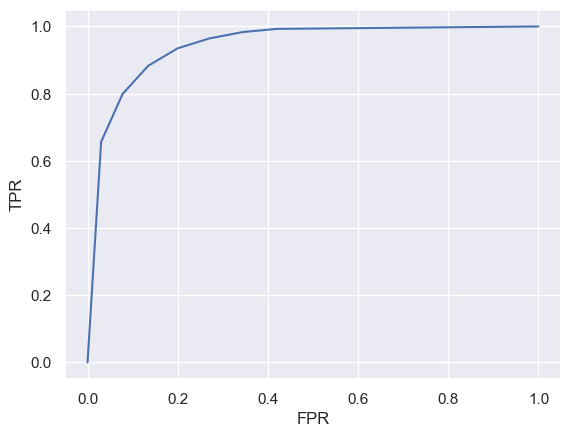

In [66]:
from sklearn.metrics import roc_curve
y_pred1_proba=knn.predict_proba(x_test1)[:,1]
fpr,tpr,thresholds=roc_curve(y_test1,y_pred1_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [67]:
from sklearn.metrics import roc_auc_score

In [68]:
roc_auc_score(y_test1,y_pred1_proba)

0.943365462616318

# Logistic Regression

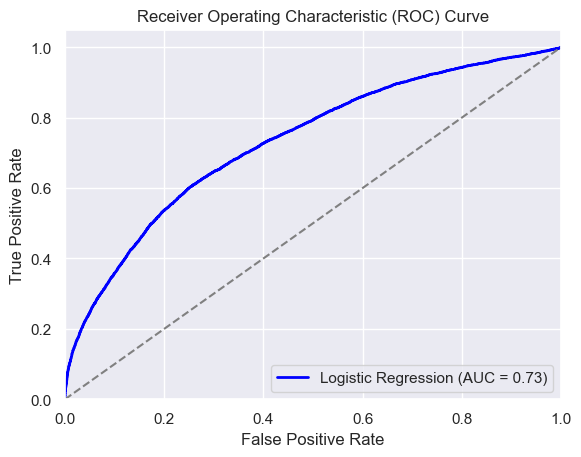

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example fitting the model (ensure this step is done before predicting)
logis = LogisticRegression()
logis.fit(x_train, y_train)  # Fit the model with your training data

# Predict probabilities for the positive class
y_pred2_proba = logis.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred2_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [71]:
y_pred2 = logis.predict(x_test)

In [72]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77     27794
           1       0.41      0.65      0.50      9035

    accuracy                           0.68     36829
   macro avg       0.63      0.67      0.63     36829
weighted avg       0.75      0.68      0.70     36829



In [73]:
roc_auc_score(y_test,y_pred2_proba)

0.7310364310054218

# Random Forest


In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,n_jobs=-1,min_samples_leaf=0.01)
rf.fit(x_train,y_train)
y_pred5=rf.predict(x_test)
print(accuracy_score(y_test,y_pred5))

0.9993211871079856


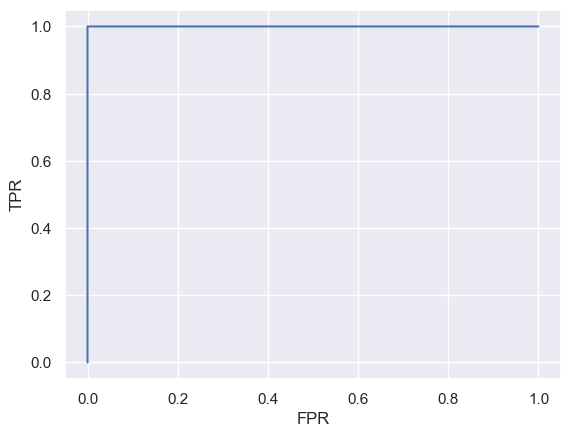

In [75]:
from sklearn.metrics import roc_curve
y_pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [76]:
roc_auc_score(y_test,y_pred_proba)

1.0

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[27769    25]
 [    0  9035]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27794
           1       1.00      1.00      1.00      9035

    accuracy                           1.00     36829
   macro avg       1.00      1.00      1.00     36829
weighted avg       1.00      1.00      1.00     36829



In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

1.0

# AdaBoostClassifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoostClassifier with default parameters
ad = AdaBoostClassifier(n_estimators=1)  # Use default base estimator, which is a DecisionTreeClassifier

# Fit the model
ad.fit(x_train, y_train)

# Make predictions
y_pred = ad.predict(x_test)

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


C:\Users\User\OneDrive\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.6853566482934644


In [80]:
print(ad.score(x_train,y_train))

0.7903924108320741


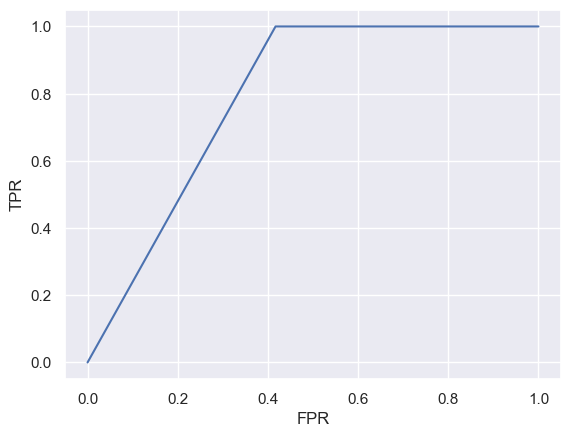

In [81]:
from sklearn.metrics import roc_curve
y_pred_proba=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7915377419586961

In [83]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16206 11588]
 [    0  9035]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.74     27794
           1       0.44      1.00      0.61      9035

    accuracy                           0.69     36829
   macro avg       0.72      0.79      0.67     36829
weighted avg       0.86      0.69      0.71     36829

